In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.DataFrame.from_csv('./dnc-temporalGraph/out.dnc-temporalGraph', sep = '\t', header = 0, index_col=None)
data = data.drop('weight', 1)
data.head()

,from,to,timestamp
0,419,465,1463507482
1,869,453,1462337903
2,943,1151,1463167636
3,943,217,1463167636
4,943,841,1463167636


In [2]:
n = np.max(data['to'])
A = np.zeros((n,n))
for index, row in data.iterrows():
    A[row['from']-1, row['to']-1] = 1 #+=1

In [3]:
import networkx as nx
G = nx.from_numpy_matrix(A,create_using=nx.DiGraph())
G.is_directed()

True

Email Graph


C:\Users\alexf\AppData\Local\Continuum\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\alexf\AppData\Local\Continuum\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\alexf\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\alexf\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is

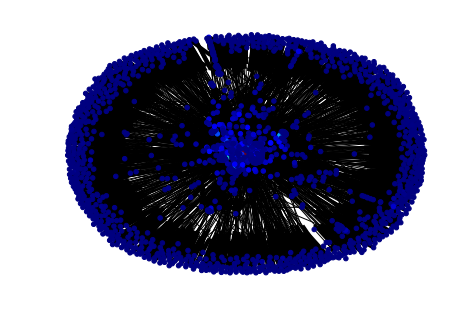

In [4]:
def draw(G):
    pos = nx.spring_layout(G)
    degree = G.degree()
    nodes = G.nodes()
    n_color = np.asarray([degree[n] for n in nodes])
    nx.draw(G, pos, node_color=n_color, node_size=20, cmap=plt.cm.jet)
    plt.show()
print('Email Graph')
draw(G)

# Communities

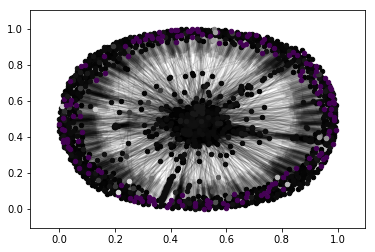

In [5]:
from community import community_louvain

import networkx as nx
import matplotlib.pyplot as plt

#better with karate_graph() as defined in networkx example.
#erdos renyi don't have true community structure
#G = nx.erdos_renyi_graph(30, 0.05)

#first compute the best partition
partition = community_louvain.best_partition(G.to_undirected())

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G, pos, alpha=0.1)
plt.figure(figsize=(50,50))
plt.show()

# Greedy Modularity Communities

In [37]:
community_louvain.modularity(graph=G.to_undirected(),partition=partition)

0.5748484229085484

# Cliques

In [21]:
from networkx import find_cliques
clique_len_hist = {}
for clique in sorted(find_cliques(G.to_undirected()), key = lambda x: len(x)):
    clique_len_hist[frozenset(clique)]=len(clique)
#clique_len_hist.values()
clique_sizes = list(clique_len_hist.values())
max(clique_sizes)

16

(array([1607.,  346.,  267.,   99.,  334.,  138.,   84.,   20.,   27.,
          13.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <a list of 10 Patch objects>)

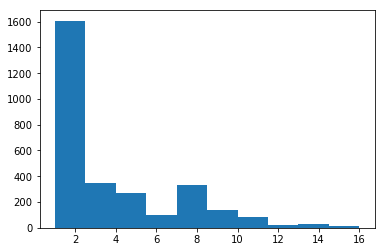

In [30]:
matplotlib.pyplot.hist(clique_sizes)

# Girvan & Newman

Attack the bridges (edges of high betwenness centraliy)

deleting edge: (1668, 1873) with betwennes centrality 0.057285747640045175
deleting edge: (1158, 1873) with betwennes centrality 0.038481849137669714
deleting edge: (452, 1873) with betwennes centrality 0.032353729780018464
deleting edge: (1158, 1668) with betwennes centrality 0.029452732246776168
deleting edge: (1873, 1905) with betwennes centrality 0.02914224374194996
deleting edge: (0, 1668) with betwennes centrality 0.027920411006913955
deleting edge: (0, 1873) with betwennes centrality 0.025755890848744203
deleting edge: (452, 1273) with betwennes centrality 0.02526538220057363
deleting edge: (1158, 1273) with betwennes centrality 0.03612672059888051
deleting edge: (452, 1668) with betwennes centrality 0.023834135036214583
deleting edge: (1253, 1951) with betwennes centrality 0.021595828062426593
we have now 2 components


C:\Users\alexf\AppData\Local\Continuum\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\alexf\AppData\Local\Continuum\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\alexf\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\alexf\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is

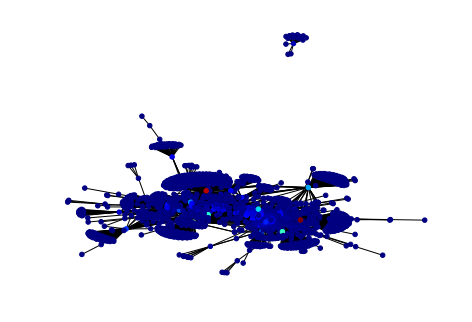

deleting edge: (0, 452) with betwennes centrality 0.019255692835952187
deleting edge: (0, 1286) with betwennes centrality 0.020327150006137194
deleting edge: (0, 277) with betwennes centrality 0.020249997316523015
deleting edge: (0, 992) with betwennes centrality 0.024544471680272444
deleting edge: (0, 1257) with betwennes centrality 0.029006470643303306
deleting edge: (0, 349) with betwennes centrality 0.021349178583263982
deleting edge: (1439, 1668) with betwennes centrality 0.01852995568064758
deleting edge: (1158, 1257) with betwennes centrality 0.017408247337246364
deleting edge: (998, 1668) with betwennes centrality 0.017194834639348476
deleting edge: (245, 1905) with betwennes centrality 0.01682012181984357
deleting edge: (245, 1036) with betwennes centrality 0.016712523633100006
deleting edge: (0, 1832) with betwennes centrality 0.016368504746092284
deleting edge: (0, 410) with betwennes centrality 0.019733238028561747
deleting edge: (0, 1750) with betwennes centrality 0.023523

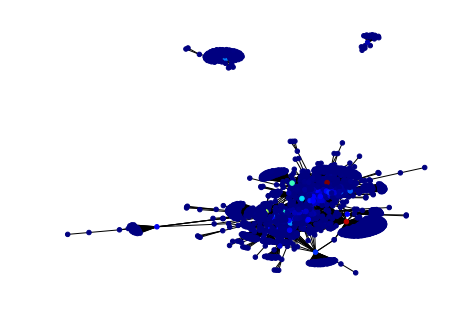

deleting edge: (487, 1273) with betwennes centrality 0.01001216390492283
deleting edge: (1273, 1404) with betwennes centrality 0.013894208636230301
deleting edge: (1273, 1689) with betwennes centrality 0.02287249832926689
deleting edge: (733, 1273) with betwennes centrality 0.0368892001801042
we have now 4 components


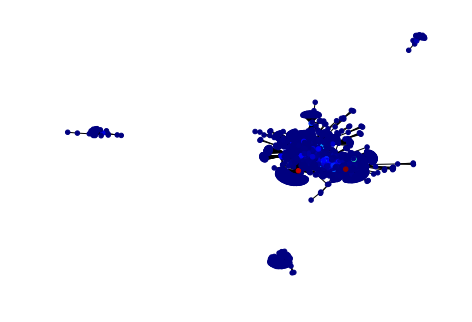

deleting edge: (1668, 1962) with betwennes centrality 0.009927683510825961
deleting edge: (840, 1668) with betwennes centrality 0.011354031893525884
deleting edge: (1668, 1767) with betwennes centrality 0.010162207522517765
deleting edge: (349, 1668) with betwennes centrality 0.01011715906371743
deleting edge: (1585, 1668) with betwennes centrality 0.010426474921718725
deleting edge: (411, 1668) with betwennes centrality 0.01104946640471049
deleting edge: (202, 1668) with betwennes centrality 0.011854972058805098
deleting edge: (1668, 1986) with betwennes centrality 0.011552493055179058
deleting edge: (340, 1705) with betwennes centrality 0.010610863691502177
deleting edge: (1668, 1769) with betwennes centrality 0.011802927609256431
deleting edge: (464, 1668) with betwennes centrality 0.014229688404917888
deleting edge: (328, 1668) with betwennes centrality 0.020869054084538805
deleting edge: (1119, 1873) with betwennes centrality 0.010853736902485242
deleting edge: (1322, 1668) with b

In [ ]:
from tqdm import tqdm_notebook
import operator

H_max = max(nx.connected_component_subgraphs(G.to_undirected()), key=len)
n_components_history=[nx.number_connected_components(H_max)]

while n_components_history[-1] <= 5:
    d_edge=nx.edge_betweenness_centrality(H_max)
    e = max(d_edge.items(),key=operator.itemgetter(1))
    print("deleting edge:", e[0], "with betwennes centrality", e[1])
    H_max.remove_edge(*e[0])
    num_comp=nx.number_connected_components(H_max)
    if num_comp > n_components_history[-1]:
        print("we have now", num_comp,"components")
        draw(H_max)
    n_components_history.append(num_comp)

See the number of components increasing very slowly with edges removed unitl 5 (where we interrupt).

Note: Since this is a very hierarchycal graph, the important we don't expect so much the existence of "community-connecting" edges, but very central people (nodes) present in many shortest paths.

Thus, deleting one mail (edge) at a time may not have a great effect on the number of components.

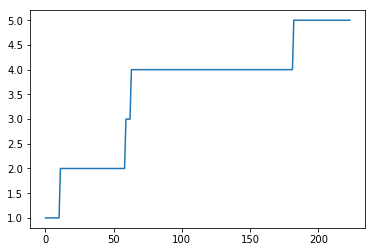

In [50]:
plt.plot(n_components_history)
plt.show()

C:\Users\alexf\AppData\Local\Continuum\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\alexf\AppData\Local\Continuum\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\alexf\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\alexf\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is

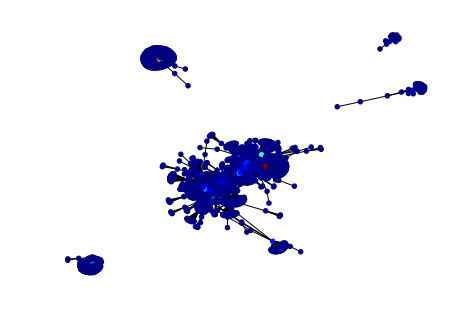

In [52]:
draw(H_max)